In [2]:
# Politican pipeline 
import plotly.plotly as py
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
import pickle
from bqplot import *
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
#ht_df.Count
from scipy.misc import imread

print("Please modify the user value")

Please modify the user value


# Directions 
This file is for creating, and interacting with political words clouds.  Simply add a valid username that has already been crawled and classified. See https://github.com/kaidb/course-2018-spr-proj/blob/master/kaidb_vilin/Twitter_to_vec/get_user_and_classify.py

In [3]:
def hash_tag_sent_build(df):
    hashtags = {}
    hts = df.hashtags.values
    pos_proba = df.pos_proba.values
    classify_rat = 0
    for i in tqdm(range(len(hts))):
        tmp_tag = list(eval(hts[i]))
        if len(tmp_tag) > 0:
            classify_rat +=1
            for j in tmp_tag:
                if j not in hashtags:
                    hashtags[j] = {0:0, 1:1, 'Count':0}
                hashtags[j][0] += (1- pos_proba[i])
                hashtags[j][1] += pos_proba[i]
                hashtags[j]['Count']+=1
    ret_df =  pd.DataFrame.from_dict(hashtags, orient='index').sort_values("Count", ascending=False)
    ret_df['pos'] = ret_df[1] / ( ret_df[0] +  ret_df[1])
    ret_df['neg'] = ret_df[0]/( ret_df[0] +  ret_df[1])
    return ret_df#.loc[ret_df["Count"] > 1]


In [4]:
# set the user 
# Charlie Baker Example
#user = 'MassGovernor'
#user = 'realDonaldTrump'
#user = 'SenWarren'
user = 'BarackObama'
#users = ['BarackObama', 'realDonaldTrump', 'MassGovernor','SenWarren' ]
orientation = 'right'
def make_cloud(user, orientation='right'):
    data_file = '{}_sentiment_data.csv'.format(user)
    hash_data = '{}_hashtags.pkl'.format(user)
    macro_sent_data = '{}_sent_stats.pkl'.format(user)
    data_path = '../Twitter_to_vec/user_tweets/'
    # orientation of twitter image
    df = pd.read_csv(data_path + user + "/" + data_file)
    ht_df = hash_tag_sent_build(df)
    twitter_mask = imread('./twitter_mask_{}.png'.format(orientation), flatten=True)
    wordcloud = WordCloud(
        background_color= None, #'#1dcaff',
        font_path='/Library/Fonts/Arial.ttf',
        relative_scaling =.25,
        mode='RGBA',
        max_words=2000,
        width=1800,
        height=1400,
        colormap='Blues_r',
        mask=twitter_mask,
        max_font_size=40, 
        random_state=42,
    ).generate_from_frequencies(dict(ht_df.Count))
    print(wordcloud)
    fig = plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, )
    plt.axis('off')
    plt.show()
    fig.savefig( data_path + user + "/"+ "{}_{}_word_cloud.png".format(user, orientation), dpi=900, transparent=True)
    return ht_df

/Users/kbernardini/anaconda3/lib/python3.6/site-packages/wordcloud/wordcloud.py:370: UserWarning:

mask image should be unsigned byte between 0 and 255. Got a float array



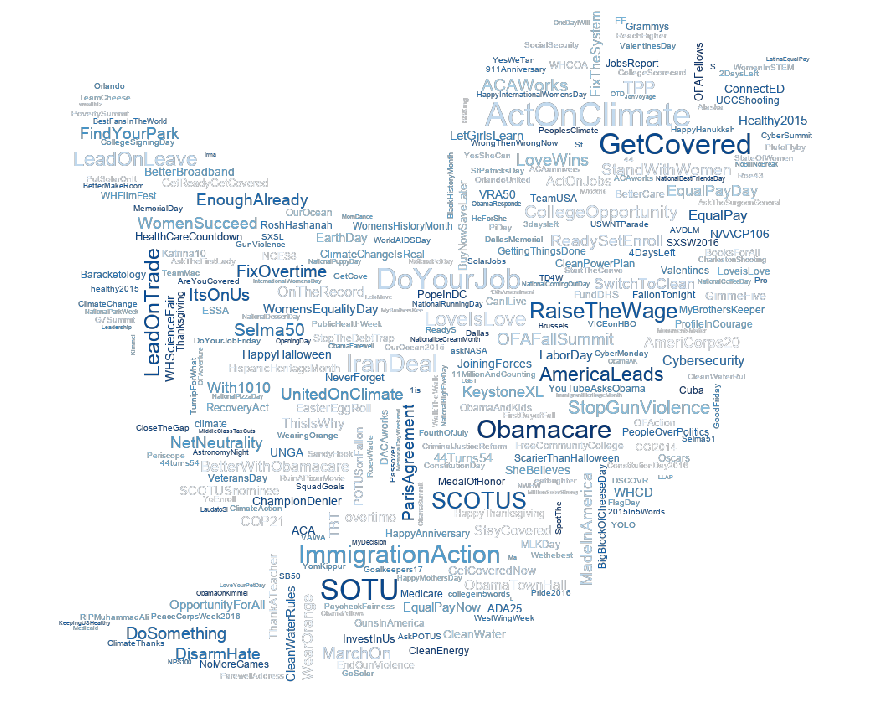

In [5]:
ht_df = make_cloud(user)

In [6]:
xs = OrdinalScale()
ys = LinearScale()

bar = Bars(x=ht_df.index.values[:10], y=ht_df.pos.values[:10], scales={'x': xs, 'y': ys}, padding=0.2, type='grouped')
xax = Axis(scale=xs)
yax = Axis(scale=ys, orientation='vertical', tick_format='0.0%', grid_lines='solid')
fig = Figure(marks=[bar], axes=[xax, yax], animation_duration=1000, )
fig.layout.width = '1200px'
fig

Figure(animation_duration=1000, axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearSca…

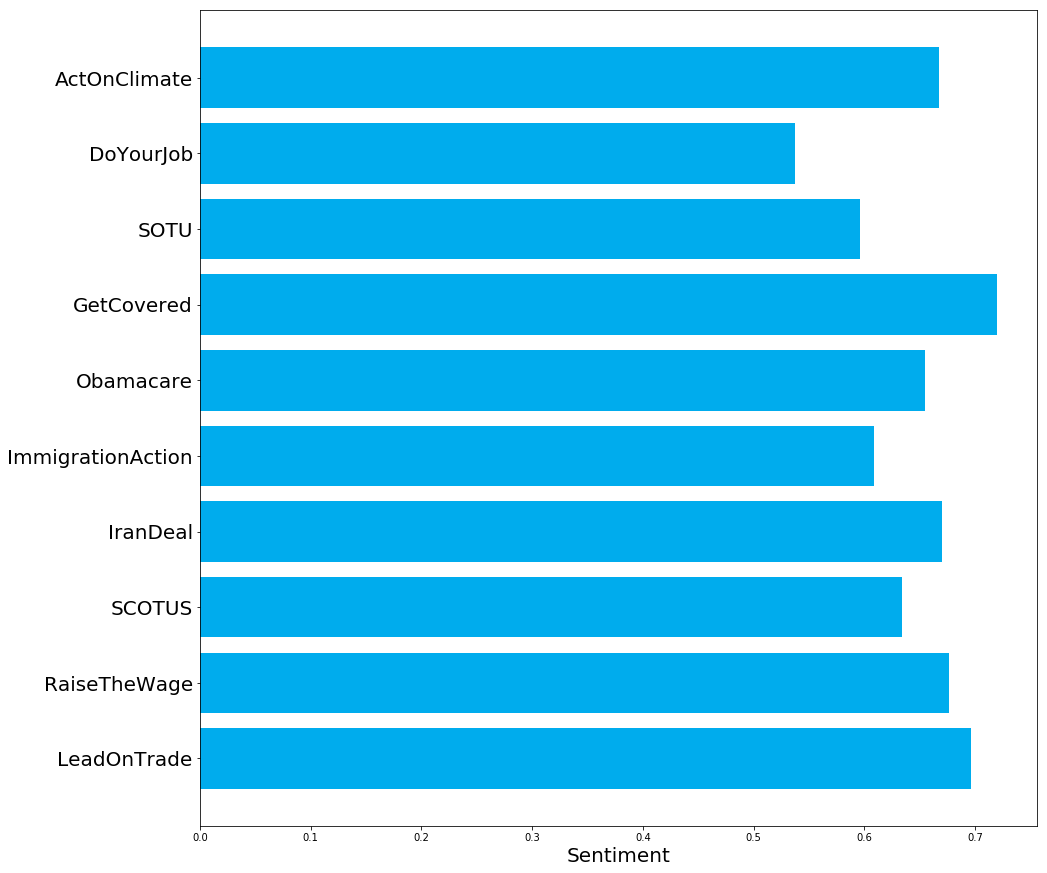

In [10]:
data_path = '../Twitter_to_vec/user_tweets/'
tags = ht_df.index.values[:10]
pos_tags = ht_df.pos.values[:10]
y_pos = np.arange(len(tags))
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(y_pos ,pos_tags, align='center',
        color='#00aced', ecolor='black')
ax.set_yticks(y_pos)
ax.set_xlabel('Sentiment', fontsize=20)
ax.set_yticklabels(tags, fontsize=20)
ax.invert_yaxis()
fig.savefig(data_path + user + "/"+'{}_bar_chart.png'.format(user), transparent=True)

In [11]:
print("DONE")

DONE
